<a href="https://colab.research.google.com/github/ahmadmirdamadi/Learn_Python_codes/blob/main/dibetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir contact/
! unzip archive.zip -d dataset

mkdir: cannot create directory ‘contact/’: File exists
Archive:  archive.zip
replace dataset/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [86]:
!cd dataset/

In [87]:
import pandas as pd
datam = pd.read_csv("dataset/diabetes.csv")

In [88]:
print(datam.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [89]:
from sklearn.model_selection import train_test_split
X = datam.drop(['Outcome'], axis=1)
y = datam['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

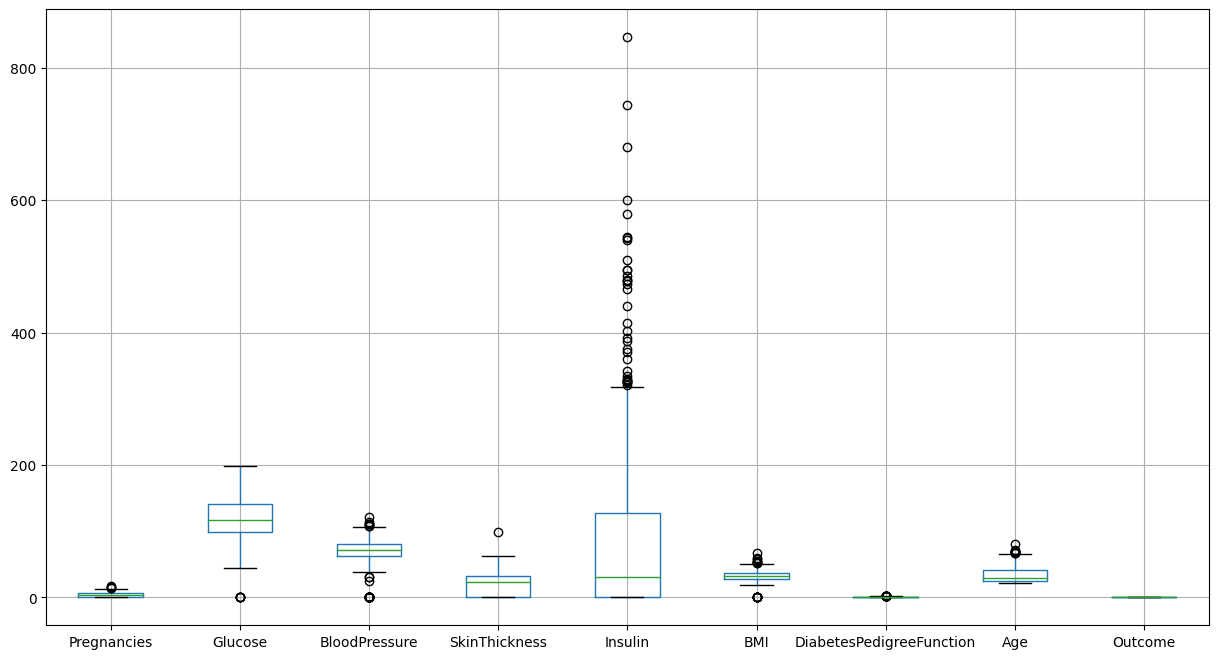

In [90]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
datam.boxplot()
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()

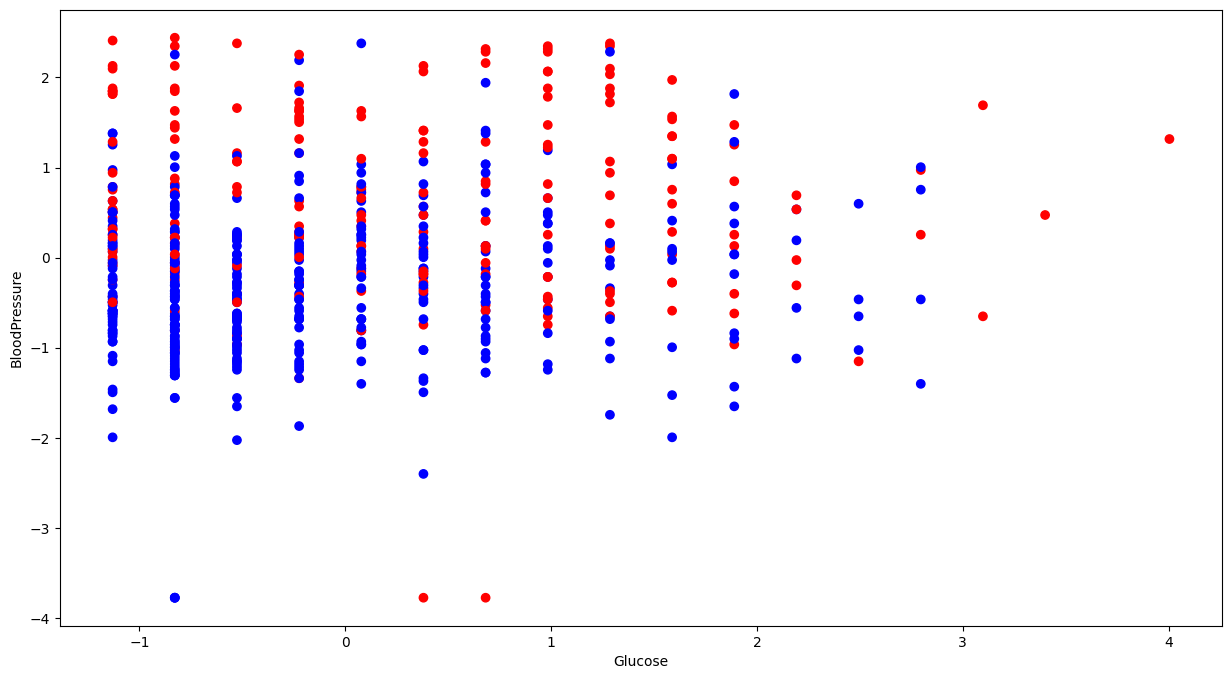

In [91]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [95]:
X_test.shape

(154, 8)

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
from keras.engine.sequential import Sequential

In [106]:
from keras.models import Sequential
from keras.layers import Dense

mag = Sequential()
mag.add(Dense(64, input_dim=8, activation='relu'))
mag.add(Dense(64, activation='relu'))
mag.add(Dense(1, activation='sigmoid'))

mag.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mag.fit(X_train, y_train, epochs=120, validation_split=0.2)


Epoch 1/120
16/16 [==============================] - 1s 18ms/step - loss: 0.6558 - accuracy: 0.6477 - val_loss: 0.6273 - val_accuracy: 0.6585
Epoch 2/120
16/16 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.7230 - val_loss: 0.5699 - val_accuracy: 0.6829
Epoch 3/120
16/16 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7637 - val_loss: 0.5314 - val_accuracy: 0.7154
Epoch 4/120
16/16 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.7821 - val_loss: 0.5021 - val_accuracy: 0.7317
Epoch 5/120
16/16 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.7841 - val_loss: 0.4819 - val_accuracy: 0.7398
Epoch 6/120
16/16 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.7923 - val_loss: 0.4791 - val_accuracy: 0.7480
Epoch 7/120
16/16 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.7943 - val_loss: 0.4724 - val_accuracy: 0.7480
Epoch 8/120


In [126]:
from sklearn.metrics import accuracy_score

y_pred = mag.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7142857142857143


In [132]:
import numpy as np

ahmad = np.array([0, 100, 110, 1, 100, 23, 1.5, 32])
ahmad = ahmad.reshape(1, 8) # تغییر شکل داده به (1, 8)
y_pred = mag.predict(ahmad) # پیش‌بینی برچسب

print(y_pred)


1/1 [==============================] - 0s 52ms/step
[[1.]]


In [134]:
import h5py
mag.save('my_model.h5')
mag.save('my_model', save_format='tf')